**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**

<style>
img
{
    display:block; 
    float:none; 
    margin-left:auto;
    margin-right:auto;
    width:80%;
}
</style> 

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one?</i></span> </center>

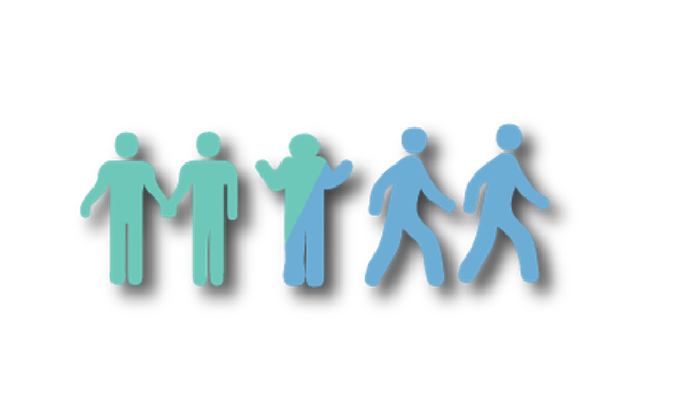

# <span style="font-family:serif; font-size:28px;"> Content</span>

1. [Introduction](#1)
    * [What is Customer Churn?](#2)
    * [How can customer churn be reducded?](#3)
    * [Objectives](#4)
2. [Loading libraries and data](#5)
3. [Undertanding the data](#6)
4. [Visualize missing values](#7)
5. [Data Manipulation](#8)
6. [Data Visualization](#9)
7. [Data Preprocessing](#10)
   * [Standardizing numeric attributes](#111)
8. [Machine Learning Model Evaluations and Predictions](#11)
   * [KNN](#101)
   * [SVC](#102)
   * [Random Forest](#103)
   * [Logistic Regression](#104)
   * [Decision Tree Classifier](#105)
   * [AdaBoost Classifier](#106)
   * [Gradient Boosting Classifier](#107)
   * [Voting Classifier](#108)



<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

___

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
#loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Undertanding the data</span>
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


* The target the we will use to guide the exploration is **Churn**

***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

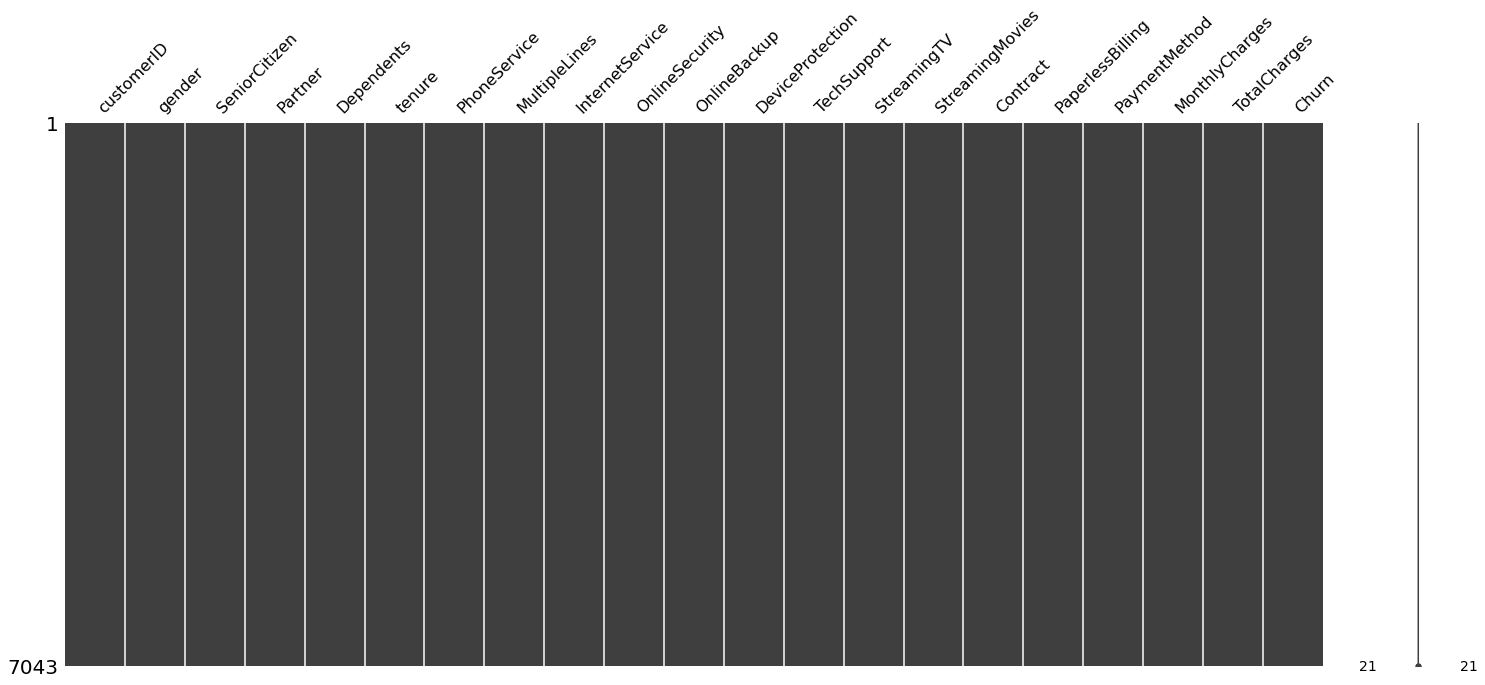

In [9]:
# Visualize missing values as a matrix
msno.matrix(df);

> Using this matrix we can very quickly find the pattern of missingness in the dataset. 
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Manipulation </span>
<a id = "8" ></a>

In [10]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [12]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [13]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column. 

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [14]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

> To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [15]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [19]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [20]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


In [21]:
import sys, plotly, nbformat, IPython
print("Python:", sys.executable)
print("plotly:", plotly.__version__)
print("nbformat:", nbformat.__version__)
print("IPython:", IPython.__version__)


Python: c:\Users\naidu\anaconda3\envs\churn_pred_env\python.exe
plotly: 6.3.0
nbformat: 5.4.0
IPython: 8.4.0


___

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

# Pick ONE renderer depending on where you run:
# Jupyter Notebook/Lab:
pio.renderers.default = "notebook_connected"
# VS Code notebooks:  # pio.renderers.default = "vscode"
# Script / flaky notebook display:  # pio.renderers.default = "browser"

# --- validate inputs ---
needed = {"gender", "Churn"}
missing = needed - set(map(str, df.columns))
if missing:
    raise KeyError(f"DataFrame is missing columns: {missing}")

# --- tidy labels ---
df = df.copy()
df["gender"] = df["gender"].astype(str).str.strip().str.title()
df["Churn"]  = df["Churn"].astype(str).str.strip().str.title()

# Quick data-check to validate 'gender' and 'Churn' values
print("gender unique:", sorted(df['gender'].unique()))
print("gender counts:\n", df['gender'].value_counts())
print("Churn unique:", sorted(df['Churn'].unique()))
print("Churn counts:\n", df['Churn'].value_counts())

# --- dynamic labels (preferred order with fallback) ---
preferred_gender = ["Male", "Female"]
preferred_churn = ["No", "Yes"]

g_labels = [lbl for lbl in preferred_gender if lbl in df['gender'].unique()]
g_labels += [lbl for lbl in sorted(df['gender'].unique()) if lbl not in g_labels]

c_labels = [lbl for lbl in preferred_churn if lbl in df['Churn'].unique()]
c_labels += [lbl for lbl in sorted(df['Churn'].unique()) if lbl not in c_labels]

# align counts to label order
g_vals = df["gender"].value_counts().reindex(g_labels, fill_value=0).to_list()
c_vals = df["Churn"].value_counts().reindex(c_labels, fill_value=0).to_list()

# --- figure ---
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])

fig.add_trace(
    go.Pie(
        labels=g_labels, values=g_vals, name="Gender",
        hole=0.4, textinfo="percent+value", textposition="inside", sort=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=c_labels, values=c_vals, name="Churn",
        hole=0.4, textinfo="percent+value", textposition="inside", sort=False
    ),
    row=1, col=2
)

fig.update_traces(
    hovertemplate="%{label}<br>Count: %{value}<br>%{percent}<extra></extra>",
    textfont_size=16
)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[
        dict(text="Gender", x=0.16, y=0.5, font=dict(size=20), showarrow=False),
        dict(text="Churn",  x=0.84, y=0.5, font=dict(size=20), showarrow=False),
    ],
    template="plotly_white",
    uniformtext_minsize=12, uniformtext_mode="hide",
    margin=dict(l=40, r=40, t=60, b=40),
    width=900, height=450
)

fig.show()

gender unique: ['Female', 'Male']
gender counts:
 gender
Male      3549
Female    3483
Name: count, dtype: int64
Churn unique: ['No', 'Yes']
Churn counts:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64


* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [23]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [24]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

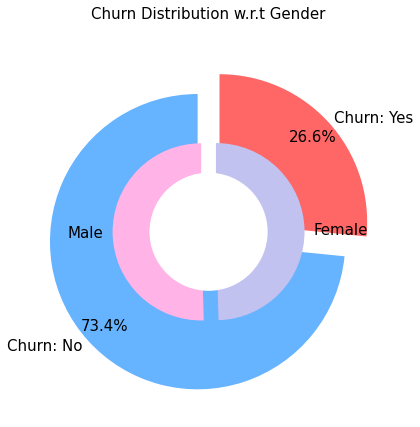

In [25]:
plt.figure(figsize=(6, 6))

# Compute counts from the dataframe (avoid hard-coded numbers)
labels = ['Churn: Yes', 'Churn: No']
values = df['Churn'].value_counts().reindex(['Yes','No'], fill_value=0).tolist()

labels_gender = ['Female', 'Male']
sizes_gender = df['gender'].value_counts().reindex(['Female','Male'], fill_value=0).tolist()

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6']
explode = (0.1, 0.1)
explode_gender = (0.05, 0.05)
textprops = {"fontsize":15}

# Outer pie: Churn distribution
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.05,
        colors=colors, startangle=90, explode=explode, radius=1.0, textprops=textprops, counterclock=False)
# Inner pie: Gender distribution
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, radius=0.6, textprops=textprops, counterclock=False)

# Draw white circle to make donuts
centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender', fontsize=15, y=1.05)
plt.axis('equal')
plt.tight_layout()
plt.show()


* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [26]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [27]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [28]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [29]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [30]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [31]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [32]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [33]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn

In [34]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers that doesn't have partners are more likely to churn

In [35]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

In [36]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Most customers churn in the absence of online security, 

In [37]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with Paperless Billing are most likely to churn.

In [38]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

In [39]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

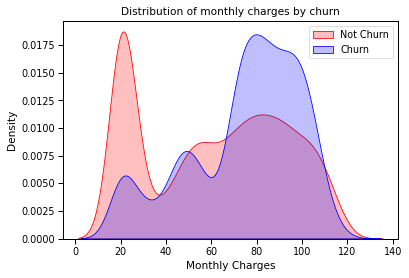

In [40]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


* Customers with higher Monthly Charges are also more likely to churn

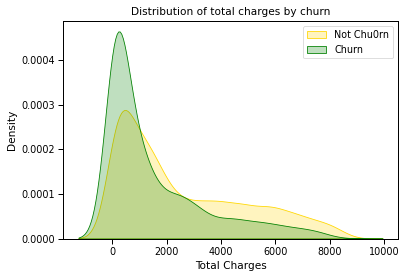

In [41]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [42]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


* New customers are more likely to churn

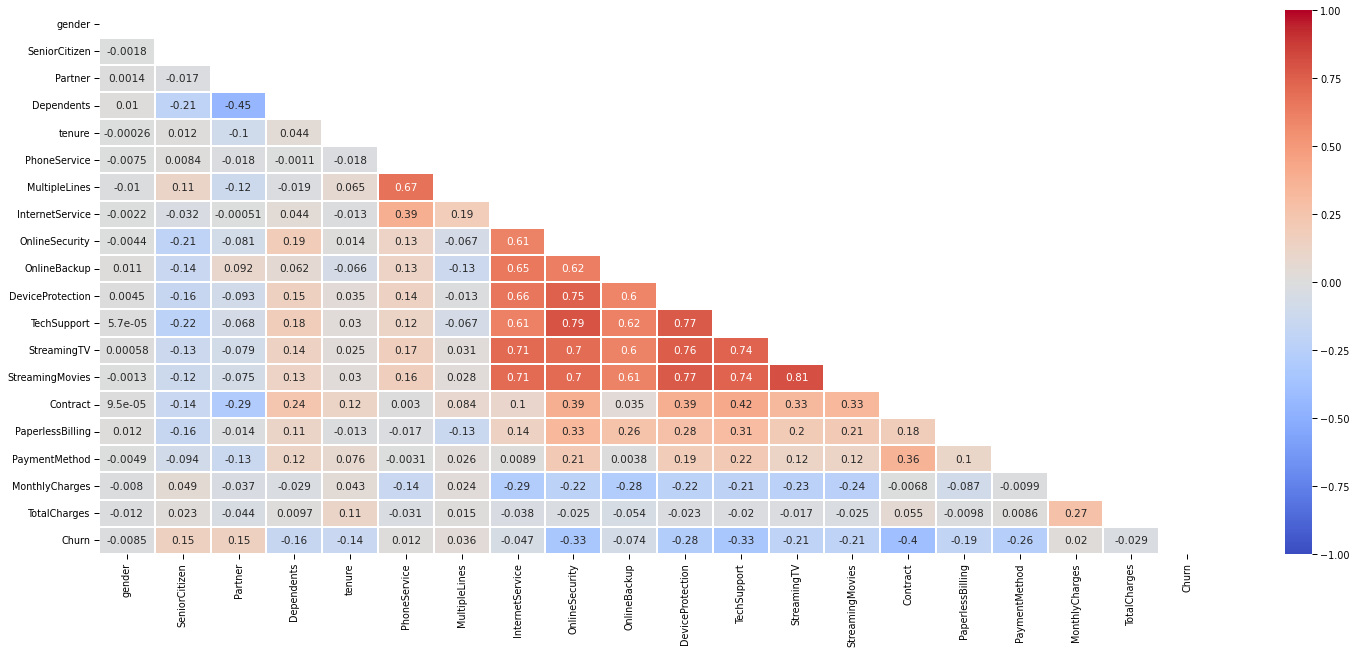

In [43]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [44]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [45]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [46]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [47]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [49]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

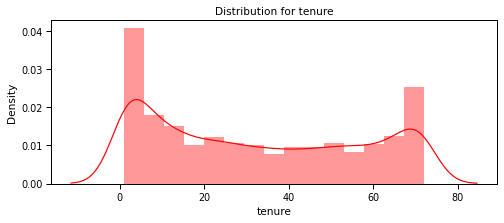

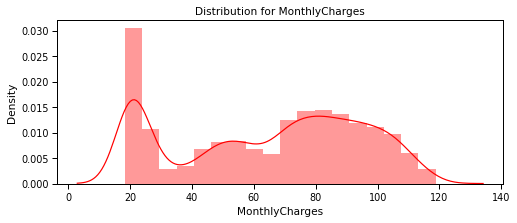

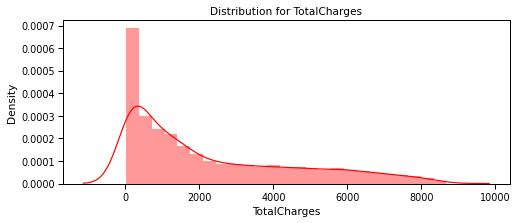

In [50]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

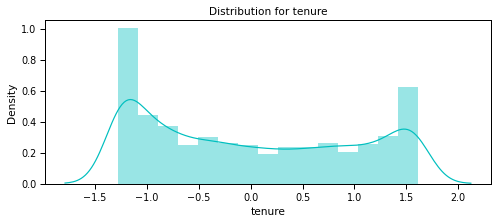

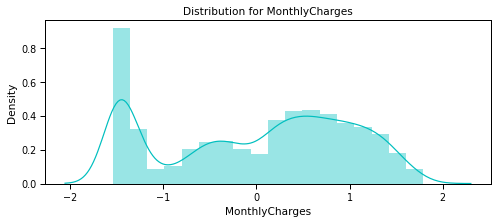

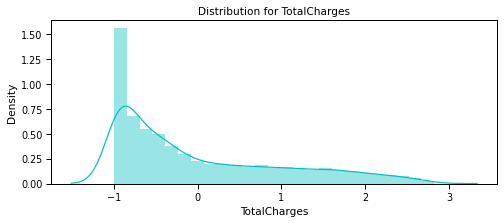

In [51]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [52]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [53]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

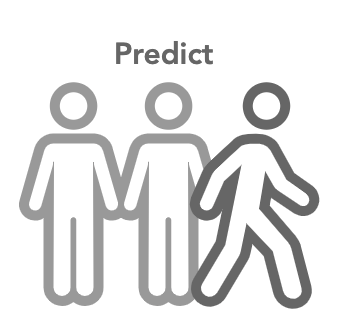

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [54]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.776303317535545


In [55]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [56]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [57]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,       # requires bootstrap=True (default)
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",  # <-- was "auto"; use "sqrt" or remove this line
    max_leaf_nodes=30
)

model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("OOB score:", getattr(model_rf, "oob_score_", None))


Accuracy: 0.8137440758293839
OOB score: 0.7950020316944332


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



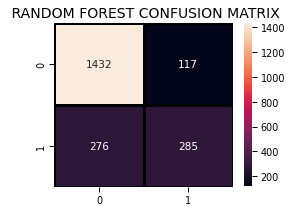

In [60]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

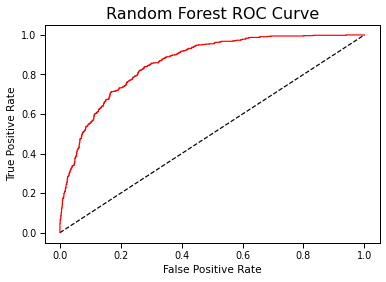

In [61]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [62]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [63]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



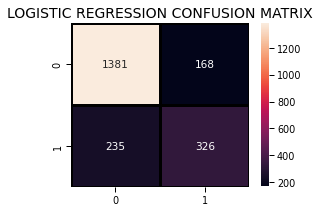

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

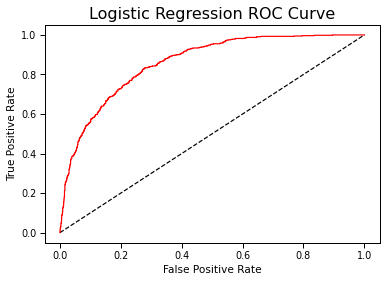

In [65]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [66]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7298578199052133


Decision tree gives very low score.

In [67]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [68]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8075829383886256

In [69]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



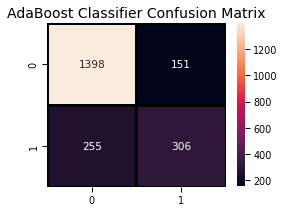

In [70]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [71]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8080568720379147


In [72]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



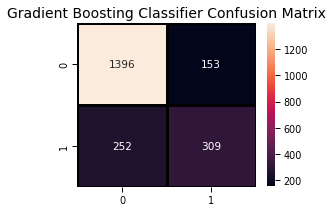

In [73]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "108" ></a>
#### **Voting Classifier**
<a id = "vc" ></a>
Let's now predict the final model based on the highest majority of voting and check it's score.

In [74]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8165876777251185


In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



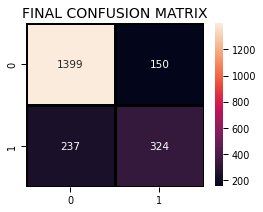

In [76]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

From the confusion matrix we can see that: 
There are total 1400+149=1549 actual non-churn values and the algorithm predicts 1400 of them as non churn and 149 of them as churn.
While there are 237+324=561 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn. 

In [77]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

,accuracy,accuracy_std,f1,f1_std,roc_auc,roc_auc_std
Random Forest,0.760,0.012,0.631,0.009,0.840,0.006
Gradient Boosting,0.799,0.008,0.572,0.028,0.839,0.008
Logistic Regression,0.742,0.012,0.621,0.009,0.838,0.008
AdaBoost,0.796,0.008,0.573,0.015,0.834,0.007
SVC (RBF),0.796,0.010,0.547,0.029,0.797,0.012
KNN (k=11),0.764,0.011,0.531,0.034,0.791,0.007


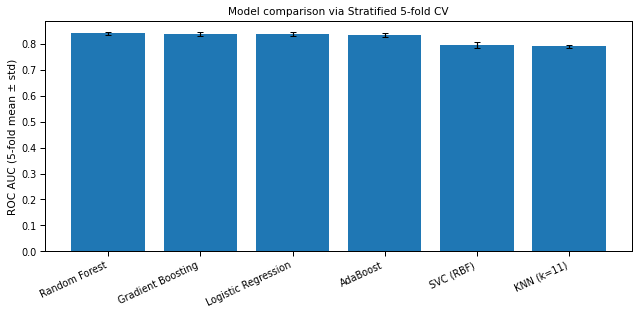

In [78]:
# 1) Define models (scale where needed INSIDE the CV via Pipeline)
models = {
    "KNN (k=11)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=11))
    ]),
    "SVC (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True, random_state=1))
    ]),
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]),
    "Random Forest": RandomForestClassifier(
        n_estimators=500, n_jobs=-1, random_state=50,
        max_features="sqrt", max_leaf_nodes=30, class_weight="balanced", oob_score=False
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=50),
    "AdaBoost": AdaBoostClassifier(n_estimators=300, random_state=50),
}

# 2) CV setup and metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"accuracy": "accuracy", "f1": "f1", "roc_auc": "roc_auc"}

# 3) Run CV
rows = []
per_model_scores = {}   # keep fold-wise scores for optional deeper plots
for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    per_model_scores[name] = scores
    rows.append(pd.Series({
        "accuracy": scores["test_accuracy"].mean(),
        "accuracy_std": scores["test_accuracy"].std(),
        "f1": scores["test_f1"].mean(),
        "f1_std": scores["test_f1"].std(),
        "roc_auc": scores["test_roc_auc"].mean(),
        "roc_auc_std": scores["test_roc_auc"].std(),
    }, name=name))

results = pd.DataFrame(rows).sort_values("roc_auc", ascending=False)

# 4) Show table
display(results.round(3))

# 5) Plot ROC-AUC with error bars
plt.figure(figsize=(9,4.5))
plt.bar(results.index, results["roc_auc"], yerr=results["roc_auc_std"], capsize=3)
plt.ylabel("ROC AUC (5-fold mean ± std)")
plt.title("Model comparison via Stratified 5-fold CV")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

# 6) Draw quick conclusions (printed guidance using your results)
best_auc_name = results["roc_auc"].idxmax()
best_auc = results.loc[best_auc_name, "roc_auc"]
best_f1_name = results["f1"].idxmax()
best_f1 = results.loc[best_f1_name, "f1"]
best_acc_name = results["accuracy"].idxmax()
best_acc = results.loc[best_acc_name, "accuracy"]

In [79]:
print("— Conclusions —")
print(f"* Best by ROC-AUC: {best_auc_name} ({best_auc:.3f}) → strongest ranking power for churn.")
print(f"* Best by F1:      {best_f1_name} ({best_f1:.3f}) → best balance of precision/recall for 'Yes'.")
print(f"* Best by Accuracy:{best_acc_name} ({best_acc:.3f}) → overall correctness (may hide imbalance).")
print("Tip: prefer ROC-AUC for imbalanced churn; if recall on 'Yes' matters, consider F1/Recall focus.")

— Conclusions —
* Best by ROC-AUC: Random Forest (0.840) → strongest ranking power for churn.
* Best by F1:      Random Forest (0.631) → best balance of precision/recall for 'Yes'.
* Best by Accuracy:Gradient Boosting (0.799) → overall correctness (may hide imbalance).
Tip: prefer ROC-AUC for imbalanced churn; if recall on 'Yes' matters, consider F1/Recall focus.


In [80]:
# Conclusions from CV 'results' table
# expects columns: accuracy, accuracy_std, f1, f1_std, roc_auc, roc_auc_std
import pandas as pd

assert set(["accuracy","accuracy_std","f1","f1_std","roc_auc","roc_auc_std"]).issubset(results.columns), \
       "results is missing required columns."

best_auc_name = results["roc_auc"].idxmax()
best_auc      = results.loc[best_auc_name, "roc_auc"]
best_auc_sd   = results.loc[best_auc_name, "roc_auc_std"]

best_f1_name  = results["f1"].idxmax()
best_f1       = results.loc[best_f1_name, "f1"]
best_f1_sd    = results.loc[best_f1_name, "f1_std"]

best_acc_name = results["accuracy"].idxmax()
best_acc      = results.loc[best_acc_name, "accuracy"]
best_acc_sd   = results.loc[best_acc_name, "accuracy_std"]

print("— Conclusions —")
print(f"* Best by ROC-AUC: {best_auc_name} ({best_auc:.3f} ± {best_auc_sd:.3f}) → strongest ranking power for churn.")
print(f"* Best by F1:      {best_f1_name} ({best_f1:.3f} ± {best_f1_sd:.3f}) → best precision/recall balance for 'Yes'.")
print(f"* Best by Accuracy:{best_acc_name} ({best_acc:.3f} ± {best_acc_sd:.3f}) → overall correctness (may hide imbalance).")
print("Tip: prefer ROC-AUC for imbalanced churn; if catching churners matters, optimize for F1/Recall.")


— Conclusions —
* Best by ROC-AUC: Random Forest (0.840 ± 0.006) → strongest ranking power for churn.
* Best by F1:      Random Forest (0.631 ± 0.009) → best precision/recall balance for 'Yes'.
* Best by Accuracy:Gradient Boosting (0.799 ± 0.008) → overall correctness (may hide imbalance).
Tip: prefer ROC-AUC for imbalanced churn; if catching churners matters, optimize for F1/Recall.


In [81]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# Base models (LR needs scaling; tree/boosting do not)
pipe_lr  = Pipeline([("scaler", StandardScaler()), ("lr",  LogisticRegression(max_iter=1000, class_weight="balanced"))])
pipe_gbc = Pipeline([("gbc", GradientBoostingClassifier(random_state=50))])
pipe_ada = Pipeline([("ada", AdaBoostClassifier(n_estimators=300, random_state=50))])

voter = VotingClassifier(
    estimators=[("gbc", pipe_gbc), ("lr", pipe_lr), ("ada", pipe_ada)],
    voting="soft"
)

# ---- 5-fold CV on TRAIN only ----
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"accuracy":"accuracy", "f1":"f1", "roc_auc":"roc_auc"}

cv_scores = cross_validate(voter, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
cv_table = pd.DataFrame({
    "accuracy_mean":[cv_scores["test_accuracy"].mean()],
    "accuracy_std":[cv_scores["test_accuracy"].std()],
    "f1_mean":[cv_scores["test_f1"].mean()],
    "f1_std":[cv_scores["test_f1"].std()],
    "roc_auc_mean":[cv_scores["test_roc_auc"].mean()],
    "roc_auc_std":[cv_scores["test_roc_auc"].std()],
}, index=["Voting (soft)"])
display(cv_table.round(4))


,accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
Voting (soft),0.7875,0.0097,0.6265,0.0158,0.8423,0.0082



== VotingClassifier: Test Metrics ==
Accuracy : 0.7863
F1       : 0.6401
ROC-AUC  : 0.8622
              precision    recall  f1-score   support

          No       0.89      0.81      0.85      1549
         Yes       0.58      0.71      0.64       561

    accuracy                           0.79      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.81      0.79      0.79      2110



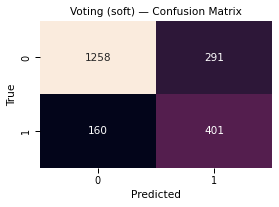

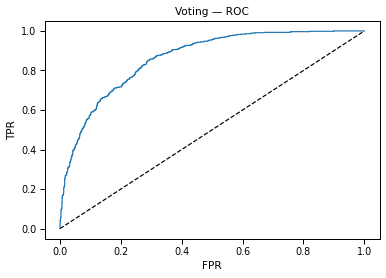

In [82]:
# Fit on full train
voter.fit(X_train, y_train)

# Predict
y_pred = voter.predict(X_test)

# Prob scores for AUC/thresholds
if hasattr(voter, "predict_proba"):
    y_score = voter.predict_proba(X_test)[:,1]
else:
    from sklearn.preprocessing import MinMaxScaler
    y_score = MinMaxScaler().fit_transform(voter.decision_function(X_test).reshape(-1,1)).ravel()

print("\n== VotingClassifier: Test Metrics ==")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("F1       :", round(f1_score(y_test, y_pred), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_score), 4))
print(classification_report(y_test, y_pred, target_names=["No","Yes"]))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False)
plt.title("Voting (soft) — Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.plot([0,1],[0,1],"k--"); plt.plot(fpr,tpr); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Voting — ROC"); plt.show()


In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    # weight LR more if recall matters; start with equal weights
    "weights": [(1,1,1), (2,1,1), (1,2,1), (1,1,2), (2,2,1), (1,2,2)],
}
gs = GridSearchCV(voter, {"weights": param_grid["weights"]}, scoring="roc_auc", cv=cv, n_jobs=-1, refit=True)
gs.fit(X_train, y_train)
print("Best weights:", gs.best_params_, "Best CV AUC:", round(gs.best_score_, 4))

# Test with tuned weights
voter_tuned = gs.best_estimator_
y_pred = voter_tuned.predict(X_test)
y_score = voter_tuned.predict_proba(X_test)[:,1]
print("TUNED — Test Accuracy:", round(accuracy_score(y_test, y_pred), 4),
      "F1:", round(f1_score(y_test, y_pred), 4),
      "ROC-AUC:", round(roc_auc_score(y_test, y_score), 4))


Best weights: {'weights': (1, 1, 1)} Best CV AUC: 0.8423
TUNED — Test Accuracy: 0.7863 F1: 0.6401 ROC-AUC: 0.8622


In [ ]:
prec, rec, thr = precision_recall_curve(y_test, y_score)
f1_vals = 2 * (prec*rec) / (prec+rec + 1e-12)
best_idx = f1_vals.argmax()
best_thr = thr[max(best_idx-1,0)]  # align threshold array length

y_opt = (y_score >= best_thr).astype(int)
print(f"Threshold tuned for best F1 → thr={best_thr:.3f}")
print("Accuracy:", round(accuracy_score(y_test, y_opt), 4),
      "F1:", round(f1_score(y_test, y_opt), 4))
print(classification_report(y_test, y_opt, target_names=["No","Yes"]))

Threshold tuned for best F1 → thr=0.539
Accuracy: 0.8104 F1: 0.6479
              precision    recall  f1-score   support

          No       0.87      0.87      0.87      1549
         Yes       0.64      0.66      0.65       561

    accuracy                           0.81      2110
   macro avg       0.76      0.76      0.76      2110
weighted avg       0.81      0.81      0.81      2110

